In [1]:

import numpy as np 
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import sympy as smp
import pandas as pd
import yfinance as yf 



## Working with python libraries that help us with mathamatical operations.

In [29]:
x, a, b, c = smp.symbols('x a b c', real=True)
print(x**2+smp.exp(a)) 
x, a, b, c = smp.symbols('x a b c', real=True)
f = smp.exp(-a*smp.sin(x**2)) * smp.sin(b**x) * smp.log(smp.Abs(c * smp.sin(x)**2 / x)) # pyright: ignore[reportOperatorIssue]
print(f)
dfdx = smp.diff(f, x)
dfdx

x**2 + exp(a)
exp(-a*sin(x**2))*log(sin(x)**2*Abs(c/x))*sin(b**x)


-2*a*x*exp(-a*sin(x**2))*log(sin(x)**2*Abs(c/x))*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(sin(x)**2*Abs(c/x))*cos(b**x) + (-c*sin(x)**2*sign(c/x)/x**2 + 2*sin(x)*cos(x)*Abs(c/x))*exp(-a*sin(x**2))*sin(b**x)/(sin(x)**2*Abs(c/x))

In [30]:
d4fdx4 = smp.diff(f, x, 4)
d4fdx4

(-24*a*b**x*x*(b**x*sin(b**x) - cos(b**x))*(c*sin(x)*sign(c/x)/x**2 - 2*cos(x)*Abs(c/x))*log(b)**2*cos(x**2)/(sin(x)*Abs(c/x)) + 8*a*b**x*x*(b**(2*x)*cos(b**x) + 3*b**x*sin(b**x) - cos(b**x))*log(b)**3*log(sin(x)**2*Abs(c/x))*cos(x**2) + 24*a*b**x*x*(c*(c*sin(x)*sign(c/x)/x**2 - 2*cos(x)*Abs(c/x))*sign(c/x)/(x**2*Abs(c/x)) - 2*(c*sin(x)*sign(c/x)/x**2 - 2*cos(x)*Abs(c/x))*cos(x)/sin(x) + (c*sin(x)**2*Derivative(sign(c/x), x)/x**2 + 4*c*sin(x)*cos(x)*sign(c/x)/x**2 - 2*c*sin(x)**2*sign(c/x)/x**3 + 2*sin(x)**2*Abs(c/x) - 2*cos(x)**2*Abs(c/x))/sin(x))*log(b)*cos(b**x)*cos(x**2)/(sin(x)*Abs(c/x)) + 16*a*b**x*x*(-2*a**2*x**2*cos(x**2)**3 - 6*a*x**2*sin(x**2)*cos(x**2) + 3*a*cos(x**2)**2 + 2*x**2*cos(x**2) + 3*sin(x**2))*log(b)*log(sin(x)**2*Abs(c/x))*cos(b**x) - 12*a*b**x*(b**x*sin(b**x) - cos(b**x))*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - cos(x**2))*log(b)**2*log(sin(x)**2*Abs(c/x)) - 24*a*b**x*(c*sin(x)*sign(c/x)/x**2 - 2*cos(x)*Abs(c/x))*(2*a*x**2*cos(x**2)**2 + 2*x**2*sin(x**2) - co

In [31]:
d4fdx4.subs([(x, 4), (a, 3), (b,2), (c,3)]).evalf() # type: ignore



1.19230131399562*(0.107390628169558*Subs(Derivative(sign(1/x), x), x, 4) + 0.53556407911191)*Subs(Derivative(sign(1/x), x), x, 4) + 2116.75859964293*Subs(Derivative(sign(1/x), x), x, 4) + 40.8019840539275*Subs(Derivative(sign(1/x), (x, 2)), x, 4) + 0.170722649436504*Subs(Derivative(sign(1/x), (x, 3)), x, 4) + 23915.9477903711

In [32]:
x = np.linspace(1,2, 100)
x

array([1.        , 1.01010101, 1.02020202, 1.03030303, 1.04040404,
       1.05050505, 1.06060606, 1.07070707, 1.08080808, 1.09090909,
       1.1010101 , 1.11111111, 1.12121212, 1.13131313, 1.14141414,
       1.15151515, 1.16161616, 1.17171717, 1.18181818, 1.19191919,
       1.2020202 , 1.21212121, 1.22222222, 1.23232323, 1.24242424,
       1.25252525, 1.26262626, 1.27272727, 1.28282828, 1.29292929,
       1.3030303 , 1.31313131, 1.32323232, 1.33333333, 1.34343434,
       1.35353535, 1.36363636, 1.37373737, 1.38383838, 1.39393939,
       1.4040404 , 1.41414141, 1.42424242, 1.43434343, 1.44444444,
       1.45454545, 1.46464646, 1.47474747, 1.48484848, 1.49494949,
       1.50505051, 1.51515152, 1.52525253, 1.53535354, 1.54545455,
       1.55555556, 1.56565657, 1.57575758, 1.58585859, 1.5959596 ,
       1.60606061, 1.61616162, 1.62626263, 1.63636364, 1.64646465,
       1.65656566, 1.66666667, 1.67676768, 1.68686869, 1.6969697 ,
       1.70707071, 1.71717172, 1.72727273, 1.73737374, 1.74747

In [33]:
# d4fdx4_f = smp.lambdify((x,a,b,c), d4fdx4)
# y = d4fdx4_f(x, a=1, b=2, c=3)


In [34]:
# plt.plot(x, y)
# plt.ylabel('$d^4f / dx^4$')
# plt.xlabel('X')

First few y values: [-2.0070989  -1.98697232 -1.96593486 -1.94407332 -1.92147488]


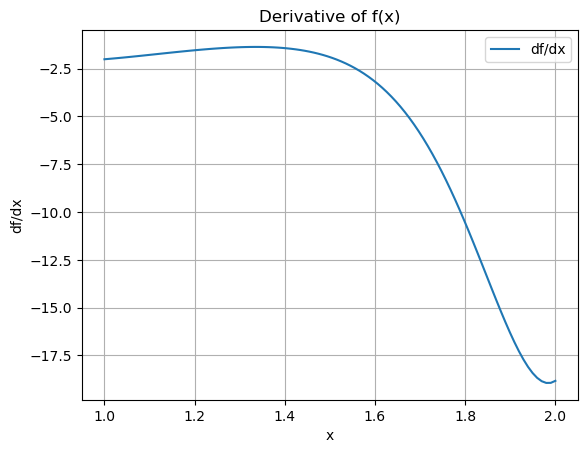

In [35]:
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

# Step 1. Define symbols
x, a, b, c = smp.symbols('x a b c', real=True)

# Step 2. Define the function f(x)
f = smp.exp(-a * smp.sin(x**2)) * smp.sin(b**x) * smp.log(c * smp.sin(x)**2 / x)

# Step 3. Differentiate with respect to x
dfdx = smp.diff(f, x)

# Step 4. Substitute numeric constants (to simplify evaluation)
dfdx_sub = dfdx.subs({a: 1, b: 2, c: 33})

# Step 5. Lambdify into a numerical NumPy-compatible function
dfdx_func = smp.lambdify(x, dfdx_sub, modules=["numpy"])

# Step 6. Evaluate over a range of x
x_vals = np.linspace(1, 2, 100)
y_vals = dfdx_func(x_vals)

# Step 7. Print and plot results
print("First few y values:", y_vals[:5])

plt.plot(x_vals, y_vals, label="df/dx")
plt.xlabel("x")
plt.ylabel("df/dx")
plt.title("Derivative of f(x)")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
print(pd.__version__)

2.3.2


In [37]:
df = pd.read_csv(
    "C:/Users/mihir/Programming/learning_python/five_minute.csv",
    parse_dates=["time"],
    index_col="time"
)

In [38]:
df.describe()

,price
count,73720.000000
mean,1.119597
std,0.013530
min,1.088055
25%,1.108520
50%,1.119760
75%,1.129810
max,1.156935


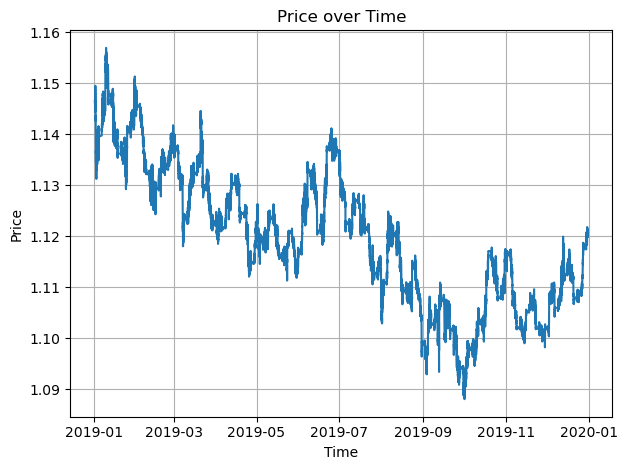

In [39]:
plt.plot(df.index, df["price"])
plt.xlabel("Time")
plt.ylabel("Price")
plt.title("Price over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

In [118]:
import numpy as np

x = df.index.astype("int64") / 1e9  # Convert to seconds
y = df["price"].values              # Ensure it's a NumPy array

dpdx = np.gradient(y, x)

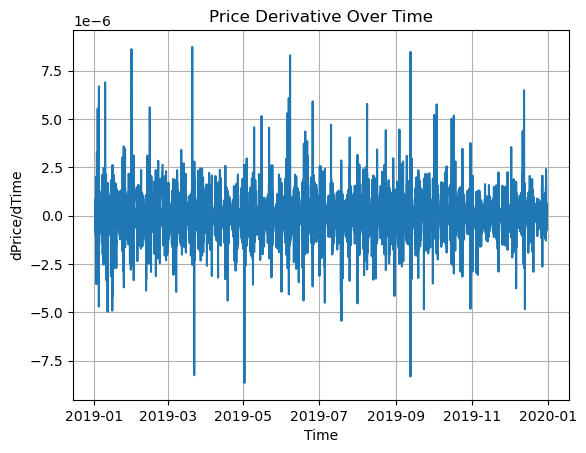

In [119]:
plt.plot(df.index, dpdx)
plt.title("Price Derivative Over Time")
plt.xlabel("Time")
plt.ylabel("dPrice/dTime")
plt.grid(True)
plt.show()
# This tells you nothing, too much randomness, and derivatives amplify noice/ 

In [42]:
filt = np.ones(15) / 15

In [43]:
y_smooth = np.convolve(y, filt, mode='valid')
dysdx = np.gradient(y_smooth, x[7:-7])
x_trimmed = x[7:-7]  # 15-point filter removes 7 points from each end
dysdx = np.gradient(y_smooth, x_trimmed)


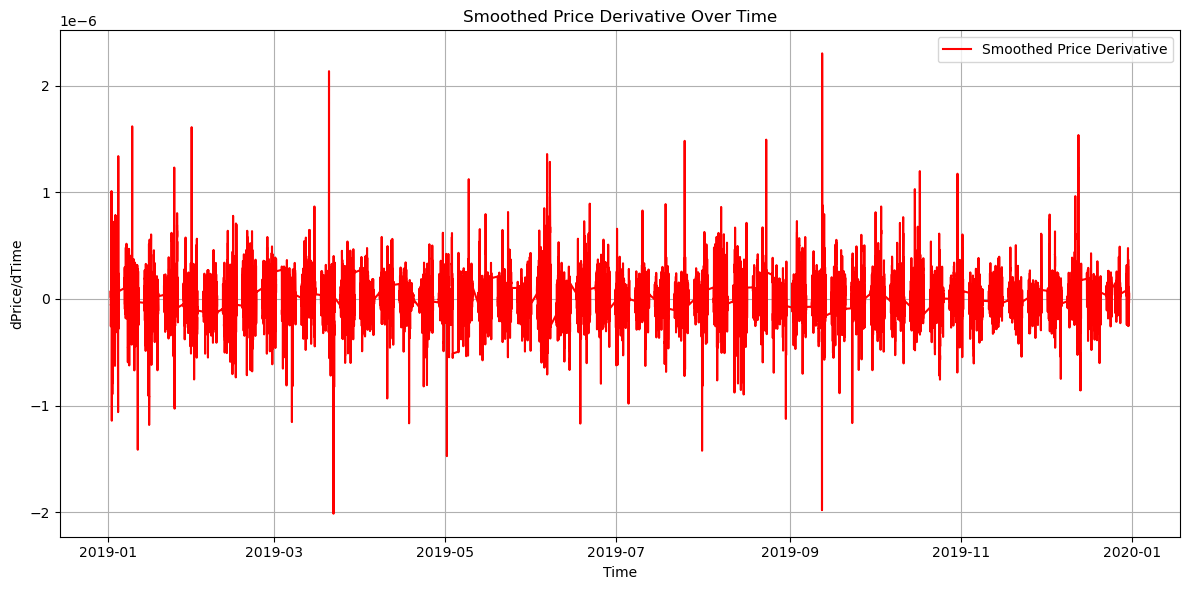

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[7:-7], dysdx, label="Smoothed Price Derivative", color="red")
plt.xlabel("Time")
plt.ylabel("dPrice/dTime")
plt.title("Smoothed Price Derivative Over Time")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
df["SMA_15"] = df["price"].rolling(window=15).mean()

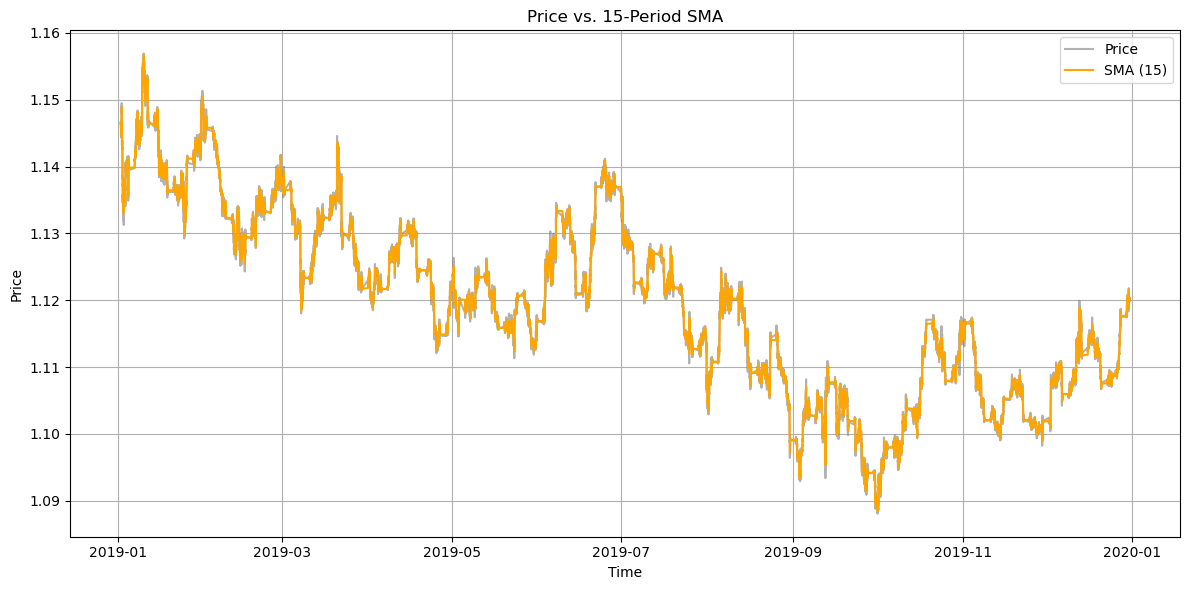

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["price"], label="Price", color="gray", alpha=0.6)
plt.plot(df.index, df["SMA_15"], label="SMA (15)", color="orange")
plt.title("Price vs. 15-Period SMA")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

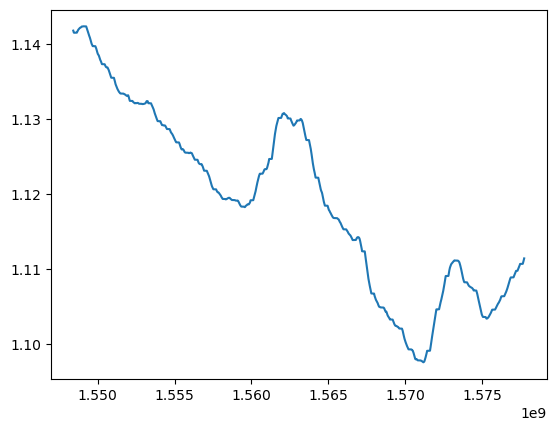

In [47]:
mean = df["price"].rolling(5000).mean()
plt.plot(x, mean)



In [48]:

x, a, b, c = smp.symbols('x a b c', real=True)
f = smp.exp(-a*smp.sin(x**2)) * smp.sin(b**x) * smp.log(smp.Abs(c * smp.sin(x)**2 / x)) # pyright: ignore[reportOperatorIssue]
print(f)
dfdx = smp.diff(f, x)
dfdx

exp(-a*sin(x**2))*log(sin(x)**2*Abs(c/x))*sin(b**x)


-2*a*x*exp(-a*sin(x**2))*log(sin(x)**2*Abs(c/x))*sin(b**x)*cos(x**2) + b**x*exp(-a*sin(x**2))*log(b)*log(sin(x)**2*Abs(c/x))*cos(b**x) + (-c*sin(x)**2*sign(c/x)/x**2 + 2*sin(x)*cos(x)*Abs(c/x))*exp(-a*sin(x**2))*sin(b**x)/(sin(x)**2*Abs(c/x))

In [49]:
x, a, b, c = smp.symbols('x a b c', real=True)
f = a*x**2 + b*x**3
print(f)
dfdx = smp.diff(f, x)
dfdx

a*x**2 + b*x**3


2*a*x + 3*b*x**2

In [50]:
dfdx.subs({a: 1, b: 1})


3*x**2 + 2*x

In [ ]:

        # f = df['price'] 
        # x = df['date']
        # print(df)
        # dpdx = np.gradient(f, x)

        # plt.plot(df.index, dpdx)
        # plt.title("Price Derivative Over Time")
        # plt.xlabel("Time")
        # plt.ylabel("dPrice/dTime")
        # plt.grid(True)
        # plt.show()
       
        # Compute first derivative
        # dpdx = np.gradient(y, x)
    
        # filt = np.ones(len(df)) / len(df)
        # y_smooth = np.convolve(y, filt, mode='valid')
        # x_trimmed = x[(len(df) // 2) : -(len(df) // 2)]
        # dpsdt = np.gradient(y_smooth, x_trimmed) 

## A simple strategy using the second derivatives of price


C:\Users\mihir\AppData\Local\Temp\ipykernel_15892\2243052556.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(self.symbol, self.start, self.end)
[*********************100%***********************]  1 of 1 completed


                  price  signal  creturns  cstrategy
time                                                
2025-09-17  3681.800049      -1  1.384708   1.859544
2025-09-18  3643.699951      -1  1.370379   1.878787
2025-09-19  3671.500000       1  1.380834   1.864453
2025-09-22  3740.699951       1  1.406860   1.897729
2025-09-23  3780.600098      -1  1.421866   1.917972
2025-09-24  3732.100098       1  1.403626   1.940659
2025-09-25  3736.899902       1  1.405431   1.941214
2025-09-26  3775.300049      -1  1.419873   1.961162
2025-09-29  3820.899902       1  1.437023   1.935513
2025-09-30  3840.800049       1  1.444507   1.943658
Total trades: 53 — Estimated cost impact: 170.08


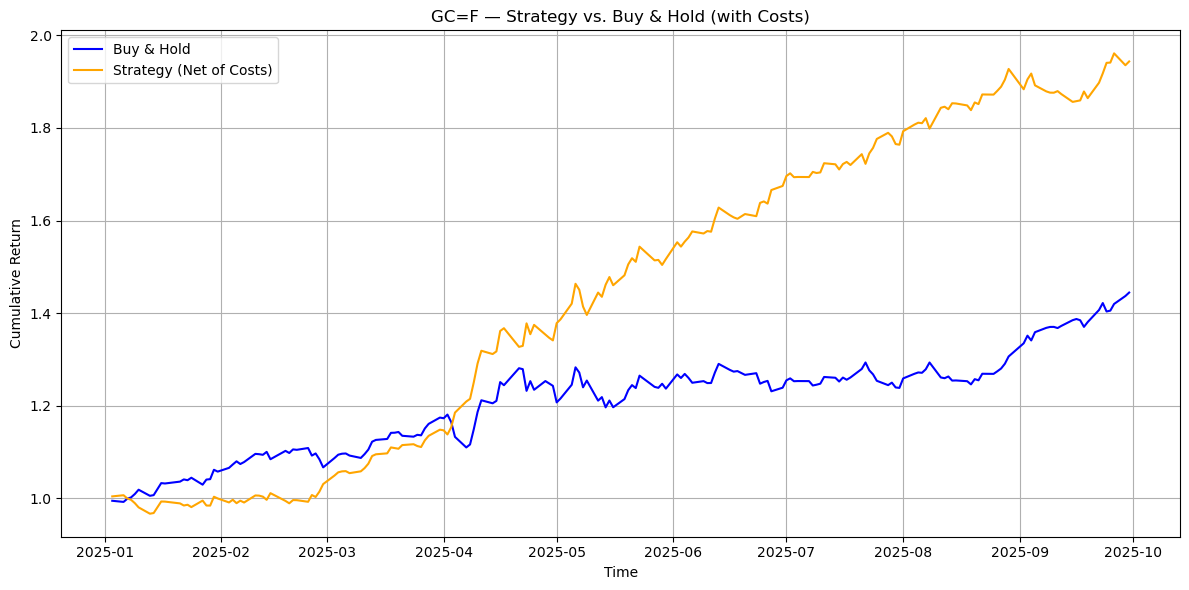

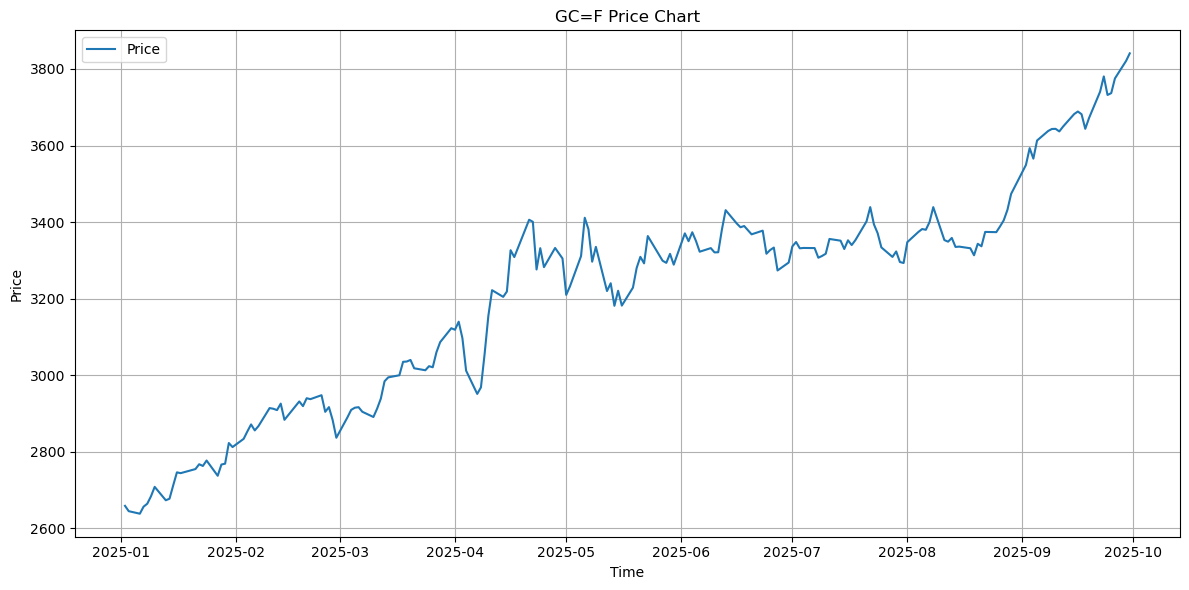

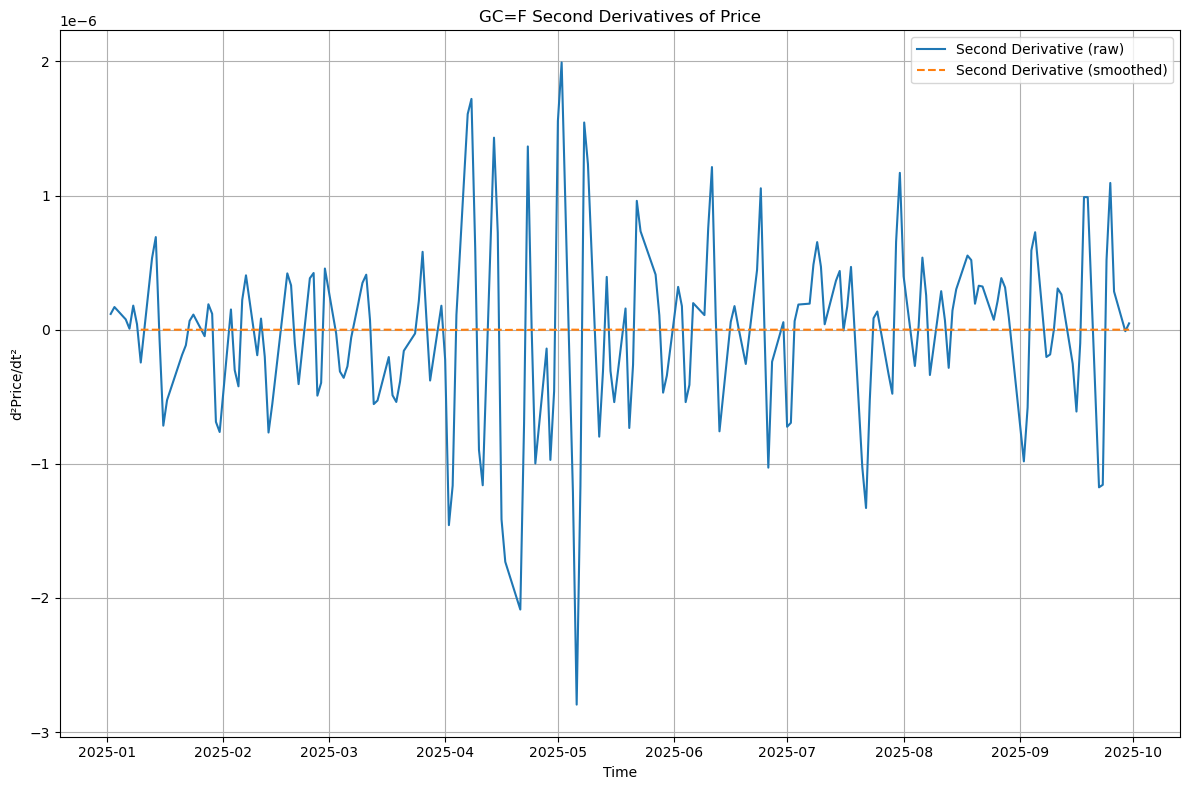

188
time
2025-01-02         NaN
2025-01-03   -0.005228
2025-01-06   -0.002495
2025-01-07    0.006936
2025-01-08    0.002936
2025-01-09    0.007243
2025-01-10    0.009203
2025-01-13   -0.012922
2025-01-14    0.001496
2025-01-15    0.013072
2025-01-16    0.012498
2025-01-17   -0.000765
2025-01-21    0.003899
2025-01-22    0.004574
2025-01-23   -0.001626
2025-01-24    0.005139
2025-01-27   -0.014330
2025-01-28    0.010703
2025-01-29    0.000831
2025-01-30    0.019465
2025-01-31   -0.003719
2025-02-03    0.007609
2025-02-04    0.006846
2025-02-05    0.006414
2025-02-06   -0.005433
2025-02-07    0.003957
2025-02-10    0.016392
2025-02-11   -0.000618
2025-02-12   -0.001202
2025-02-13    0.005810
2025-02-14   -0.014457
2025-02-18    0.016646
2025-02-19   -0.004162
2025-02-20    0.007056
2025-02-21   -0.000816
2025-02-24    0.003506
2025-02-25   -0.014722
2025-02-26    0.004235
2025-02-27   -0.011520
2025-02-28   -0.016093
2025-03-03    0.018824
2025-03-04    0.006712
2025-03-05    0.001959
20

In [ ]:
class TestMathStrat:
    def __init__(self, symbol, start, end, tc):
        self.symbol = symbol
        self.start = start
        self.end = end
        self.data = None
        self.tc = 0.001  # 0.1% per trade
        self.get_data()

    def __repr__(self):
        return f"TestMathStrat(symbol={self.symbol}, start={self.start}, end={self.end})"

    def get_data(self):
        df = yf.download(self.symbol, self.start, self.end)
        df = df[["Close"]].rename(columns={"Close": "price"})
        df.index.name = "time"
        df.columns = [col[-1] if isinstance(col, tuple) else col for col in df.columns]
        df.to_csv(f"{self.symbol}.csv", index_label="time", header=["price"]) 

        """Load price data from a local CSV file.""" 
        df = pd.read_csv( f"{self.symbol}.csv", parse_dates=["time"], index_col="time")
        self.data = df
    
    def plot_chart(self):
        df = self.data.copy()
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df["price"], label="Price")
        plt.title(f"{self.symbol} Price Chart")
        plt.xlabel("Time")
        plt.ylabel("Price")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def prepare_strategy(self):
        if self.data is None:
            raise ValueError("Data not loaded. Run get_data() first.")

        df = self.data.copy().reset_index().rename(columns={"index": "time"})
        df["time_sec"] = (df["time"] - df["time"].min()).dt.total_seconds()

        f = df["price"].values
        x = df["time_sec"].values

        if len(df) < 3:
            df["d2pdt2"] = np.nan
        else:
            dfdx = np.gradient(f, x)
            d2fdx2 = np.gradient(dfdx, x)
            df["d2pdt2"] = 300 * d2fdx2

        df['price_smooth'] = df['price'].rolling(window=5).mean()
        first_der_smooth = np.gradient(df["price_smooth"], x)
        df["second_der_smooth"] = np.gradient(first_der_smooth, x)

        df.set_index("time", inplace=True)
        self.data = df

    def plot_derivatives(self):
        if self.data is None:
            print("Please run get_data() and prepare_strategy() first.")
            return

        df = self.data.copy().reset_index()
        plt.figure(figsize=(12, 8))
        plt.plot(df["time"], df["d2pdt2"], label="Second Derivative (raw)")
        plt.plot(df["time"], df["second_der_smooth"], label="Second Derivative (smoothed)", linestyle="--")
        plt.title(f"{self.symbol} Second Derivatives of Price")
        plt.xlabel("Time")
        plt.ylabel("d²Price/dt²")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    def test_strategy(self):
        if self.data is None or "second_der_smooth" not in self.data.columns:
            print("Please run prepare_strategy() first.")
            return

        df = self.data.copy()

        # Generate signal
        df["signal"] = np.where(df["second_der_smooth"] > 0, 1, -1)

        # Calculate returns
        df["returns"] = df["price"].pct_change()
        df["creturns"] = (1 + df["returns"]).cumprod()

        # Strategy returns
        df["signal_shifted"] = df["signal"].shift(1)
        df["strategy_returns"] = df["returns"] * df["signal_shifted"]

        # --- Trading cost logic ---
        self.tc = 0.001  # 0.1% per trade
        df["trade"] = df["signal_shifted"].ne(df["signal_shifted"].shift(1)).astype(int)
        df["strategy_returns_net"] = df["strategy_returns"] - self.tc * df["trade"]
        df["cstrategy"] = (1 + df["strategy_returns_net"]).cumprod()

        self.data = df

        print(df[["price", "signal", "creturns", "cstrategy"]].tail(10))
        print(f"Total trades: {df['trade'].sum()} — Estimated cost impact: {(df['trade'].sum() * self.tc * df['price'].mean()):.2f}")

        # Plot
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df["creturns"], label="Buy & Hold", color="blue")
        plt.plot(df.index, df["cstrategy"], label="Strategy (Net of Costs)", color="orange")
        plt.title(f"{self.symbol} — Strategy vs. Buy & Hold (with Costs)")
        plt.xlabel("Time")
        plt.ylabel("Cumulative Return")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    def analysing_results(self, rrr=None):
        print(len(self.data))
        print(self.data["returns"])
        #Calculating sharpe ratio 
        df = self.data.copy()
        sharp_ratio = float(df["returns"].mean() - rrr)/(df["returns"].std())
        print(f"Sharpe Ratio: {sharp_ratio}")


ticker = TestMathStrat("GC=F", "2025-01-01", "2025-10-01", 0.001)
ticker.prepare_strategy()
ticker.test_strategy()
ticker.plot_chart()
ticker.plot_derivatives()
ticker.analysing_results(0.01)


## Even the simple strategies can perform great. 

As we saw, this very simple strategy performed great returns, even 2x returns including trading costs. We also saw that although this strategy was great for 1 day candles and longer periods of time, it was horrible for intraday. So, backtest carefully before trading!